# Standardization Procedure for Bayesian RRR

## Meta-Method
>Bayesian RRR will do best under the normal assumption, thus I will perform an aggro standardization and a non-aggro

### AGGRO
- power transforms on intense skews, along with robust scaler
- robust scaler on mild skews
- standard scaler on normal

### NON-AGGRO
- **NO POWER TRANSFORMS**
- robust scaling on all skews
- standard on normal

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv('../../../data/zip2/merged_output.csv')
df

,subject_id,ratio,project,smoke,liqour,diabetes,hypertension,high_cholesterol,heart_disease,score,age,edu,sex,sleep_efficiency_pla,sleep_efficiency_wei
0,22002,0.000962,extend,0,0.5,0,1.0,1,0,79.0,73,14,Female,0.860,0.856
1,22020,0.001367,extend,0,0.0,0,1.0,1,1,53.0,71,13,Female,0.899,0.901
2,22041,0.003285,extend,1,1.0,0,1.0,0,1,68.0,71,17,Female,0.875,0.874
3,22042,0.001130,extend,0,8.0,0,1.0,0,0,71.0,56,15,Female,0.831,0.829
4,22053,0.000948,extend,1,2.5,1,0.0,0,1,63.0,59,16,Male,0.923,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3077,0.001701,pacr,1,0.0,1,0.0,0,1,82.0,65,18,Female,0.770,0.710
238,3089,0.001803,pacr,1,0.0,0,1.0,0,1,86.0,68,18,Female,0.922,0.923
239,3098,0.004829,pacr,1,0.0,0,1.0,0,1,58.0,73,18,Female,0.938,0.938
240,3102,0.001225,pacr,1,0.0,0,1.0,0,0,72.0,65,12,Female,0.873,0.873


In [122]:
df.drop(columns=['project'], inplace=True) # drop the project column as it is not needed for scaling
df

,subject_id,ratio,smoke,liqour,diabetes,hypertension,high_cholesterol,heart_disease,score,age,edu,sex,sleep_efficiency_pla,sleep_efficiency_wei
0,22002,0.000962,0,0.5,0,1.0,1,0,79.0,73,14,Female,0.860,0.856
1,22020,0.001367,0,0.0,0,1.0,1,1,53.0,71,13,Female,0.899,0.901
2,22041,0.003285,1,1.0,0,1.0,0,1,68.0,71,17,Female,0.875,0.874
3,22042,0.001130,0,8.0,0,1.0,0,0,71.0,56,15,Female,0.831,0.829
4,22053,0.000948,1,2.5,1,0.0,0,1,63.0,59,16,Male,0.923,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3077,0.001701,1,0.0,1,0.0,0,1,82.0,65,18,Female,0.770,0.710
238,3089,0.001803,1,0.0,0,1.0,0,1,86.0,68,18,Female,0.922,0.923
239,3098,0.004829,1,0.0,0,1.0,0,1,58.0,73,18,Female,0.938,0.938
240,3102,0.001225,1,0.0,0,1.0,0,0,72.0,65,12,Female,0.873,0.873


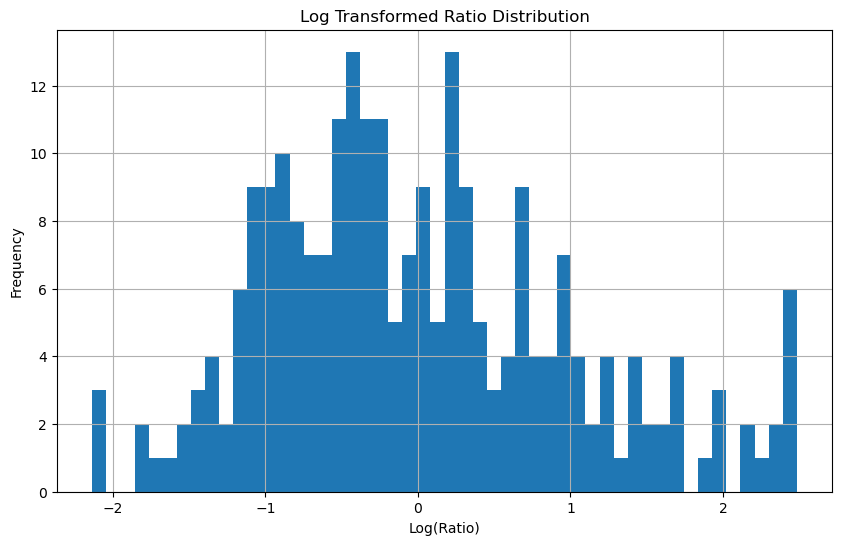

In [123]:
# apply power transform to ratio columns to reduce skewness, then standard scale
# Check for NaN values in the 'ratio' column before applying transformations
if df['ratio'].isnull().any():
    print("There are NaN values in the 'ratio' column. Please handle them before scaling.")
else:
    # apply yeo-johnson transformation to reduce skewness
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df['ratio'] = pt.fit_transform(df[['ratio']])

# standard scale
scaler = StandardScaler()
df['ratio'] = scaler.fit_transform(df[['ratio']]) # standard scaling
df['ratio'].hist(bins=50, figsize=(10, 6))
plt.title('Log Transformed Ratio Distribution')
plt.xlabel('Log(Ratio)')
plt.ylabel('Frequency')
plt.show()

In [124]:
df['ratio'].describe()

count    2.420000e+02
mean    -4.110578e-16
std      1.002073e+00
min     -2.135433e+00
25%     -7.431896e-01
50%     -1.660168e-01
75%      6.610912e-01
max      2.483904e+00
Name: ratio, dtype: float64

In [125]:
# one-hot encode the categorical columns
columns = ['smoke', 'diabetes', 'hypertension', 'high_cholesterol', 'heart_disease', 'sex']
df = pd.get_dummies(df, columns=columns, drop_first=True) # one-hot encode and drop first to avoid dummy variable trap
df

,subject_id,ratio,liqour,score,age,edu,sleep_efficiency_pla,sleep_efficiency_wei,smoke_1,diabetes_1,hypertension_1.0,high_cholesterol_1,heart_disease_1,sex_Male
0,22002,-0.878393,0.5,79.0,73,14,0.860,0.856,False,False,True,True,False,False
1,22020,0.097163,0.0,53.0,71,13,0.899,0.901,False,False,True,True,True,False
2,22041,2.010687,1.0,68.0,71,17,0.875,0.874,True,False,True,False,True,False
3,22042,-0.431555,8.0,71.0,56,15,0.831,0.829,False,False,True,False,False,False
4,22053,-0.917660,2.5,63.0,59,16,0.923,0.924,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3077,0.683182,0.0,82.0,65,18,0.770,0.710,True,True,False,False,True,False
238,3089,0.831984,0.0,86.0,68,18,0.922,0.923,True,False,True,False,True,False
239,3098,2.354946,0.0,58.0,73,18,0.938,0.938,True,False,True,False,True,False
240,3102,-0.207284,0.0,72.0,65,12,0.873,0.873,True,False,True,False,False,False


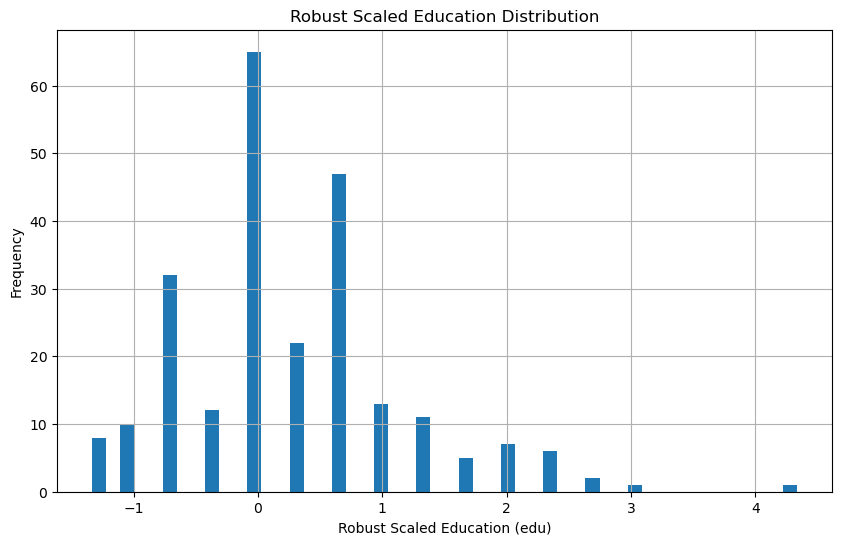

In [126]:
# robust scaler 'edu' column
# Apply RobustScaler to the 'edu' column to reduce the influence of outliers
robust_scaler = RobustScaler()
df['edu'] = robust_scaler.fit_transform(df[['edu']]) # robust scaling
df['edu'].hist(bins=50, figsize=(10, 6))
plt.title('Robust Scaled Education Distribution')
plt.xlabel('Robust Scaled Education (edu)')
plt.ylabel('Frequency')
plt.show()


In [127]:
df.drop(columns=['sleep_efficiency_pla'], inplace=True, errors='ignore') # drop the sleep_efficiency_plan column if it exists, as it is not needed for scaling
df.columns

Index(['subject_id', 'ratio', 'liqour', 'score', 'age', 'edu',
       'sleep_efficiency_wei', 'smoke_1', 'diabetes_1', 'hypertension_1.0',
       'high_cholesterol_1', 'heart_disease_1', 'sex_Male'],
      dtype='object')

In [128]:
# replace the value in 'sleep_efficiency_wei' that is 0 with 2 std below the mean of the column, as it is an outlier
if (df['sleep_efficiency_wei'] == 0).any():
    mean_value = df['sleep_efficiency_wei'].mean()
    std_value = df['sleep_efficiency_wei'].std()
    replacement_value = mean_value - 2 * std_value
    df.loc[df['sleep_efficiency_wei'] == 0, 'sleep_efficiency_wei'] = replacement_value

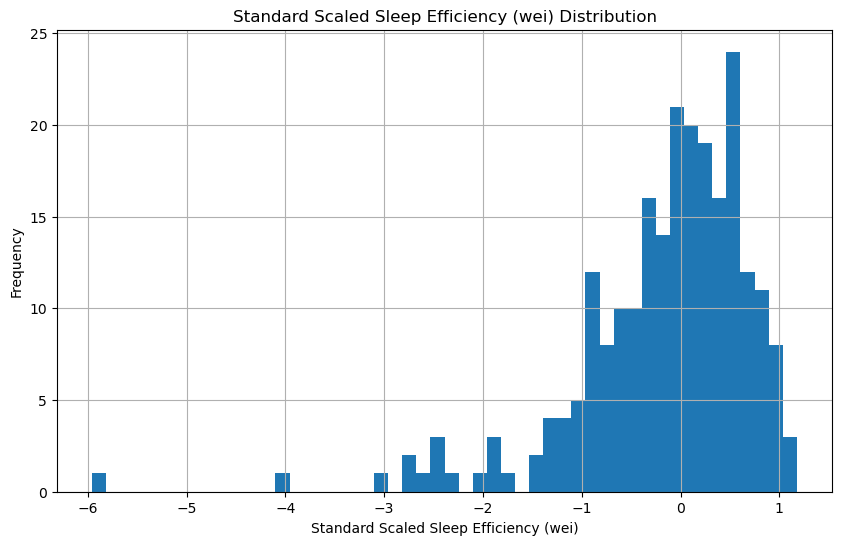

In [129]:
# standard scale the 'sleep_efficiency_wei' column
if 'sleep_efficiency_wei' in df.columns:
    scaler = RobustScaler()
    df['sleep_efficiency_wei'] = scaler.fit_transform(df[['sleep_efficiency_wei']]) # standard scaling
    df['sleep_efficiency_wei'].hist(bins=50, figsize=(10, 6))
    plt.title('Standard Scaled Sleep Efficiency (wei) Distribution')
    plt.xlabel('Standard Scaled Sleep Efficiency (wei)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The column 'sleep_efficiency_wei' does not exist in the DataFrame. Cannot apply standard scaling.")

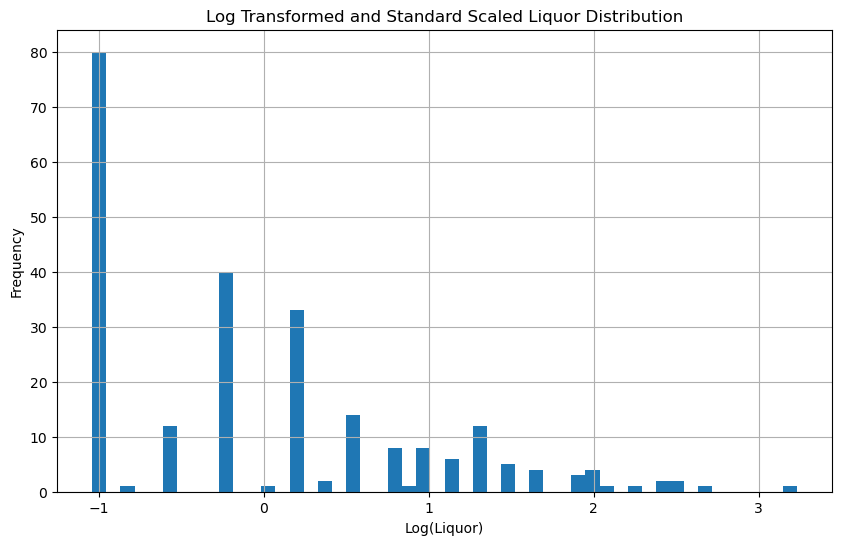

In [130]:
# log transform and standard scale the 'liquor' column
if 'liqour' in df.columns:
    # Check for NaN values in the 'liquor' column before applying transformations
    if df['liqour'].isnull().any():
        print("There are NaN values in the 'liquor' column. Please handle them before scaling.")
    else:
        # apply log transformation to reduce skewness
        df['liqour'] = np.log1p(df['liqour'])  # log1p handles zero values by using log(1+x)
        
        # standard scale
        scaler = StandardScaler()
        df['liqour'] = scaler.fit_transform(df[['liqour']])
        
        df['liqour'].hist(bins=50, figsize=(10, 6))
        plt.title('Log Transformed and Standard Scaled Liquor Distribution')
        plt.xlabel('Log(Liquor)')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("The column 'liquor' does not exist in the DataFrame. Cannot apply transformations.")
    

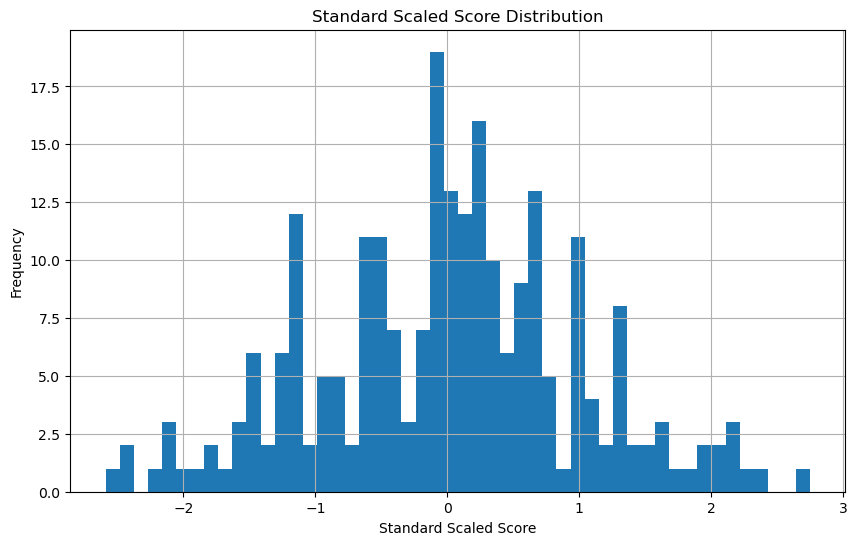

In [131]:
# replace nan with mean for 'score' column if it exists
if 'score' in df.columns:
    if df['score'].isnull().any():
        mean_value = df['score'].mean()
        df['score'].fillna(mean_value, inplace=True)  # replace NaN with mean
    else:
        print("No NaN values found in the 'score' column.")
else:
    print("The column 'score' does not exist in the DataFrame.")

# standard scale the 'score' column
scaler = StandardScaler()
if 'score' in df.columns:
    df['score'] = scaler.fit_transform(df[['score']]) # standard scaling
    df['score'].hist(bins=50, figsize=(10, 6))
    plt.title('Standard Scaled Score Distribution')
    plt.xlabel('Standard Scaled Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The column 'score' does not exist in the DataFrame. Cannot apply standard scaling.")

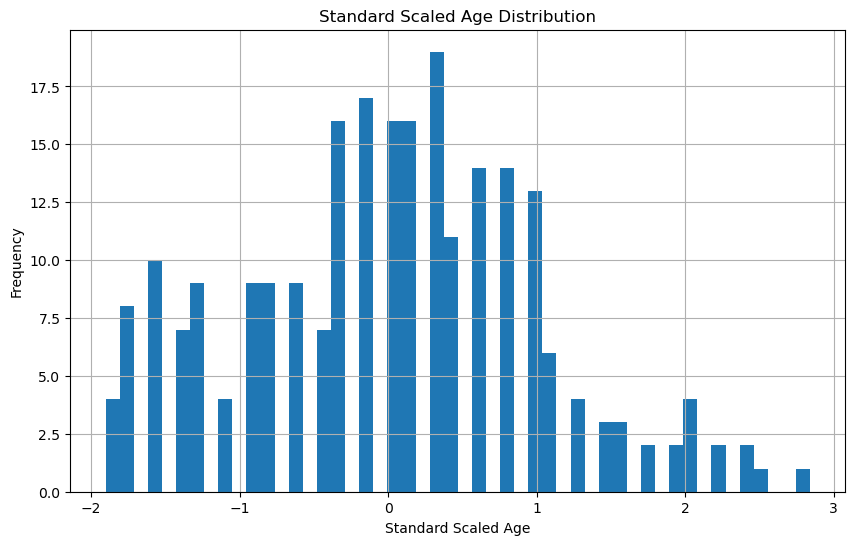

In [132]:
# standard scale the 'age' column
scaler = StandardScaler()
if 'age' in df.columns:
    df['age'] = scaler.fit_transform(df[['age']]) # standard scaling
    df['age'].hist(bins=50, figsize=(10, 6))
    plt.title('Standard Scaled Age Distribution')
    plt.xlabel('Standard Scaled Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The column 'age' does not exist in the DataFrame. Cannot apply standard scaling.")



In [133]:
# make sure there are no NaN values in the dataframe before saving
if df.isnull().values.any():
    print("There are still NaN values in the DataFrame. Please handle them before saving.")
    print(df[df.isnull().values==True]) # print the rows with NaN values for debugging]
# fill any remaining NaN values with the mean of the column (if any)
    df.fillna(df.mean(), inplace=True)  # fill NaN with mean of the column
    print("All NaN values have been handled. Proceeding to save the DataFrame.")


There are still NaN values in the DataFrame. Please handle them before saving.
     subject_id     ratio    liqour     score       age       edu  \
42        22228  0.053689 -0.578469  0.367238 -1.270549 -1.333333   
87        22630  0.736400  1.322169  0.000000  0.627432  0.000000   
90        22641 -2.099860 -1.038835  0.000000 -0.321559  2.333333   
154     1120037  0.546737  0.535167 -1.275668  2.367247 -0.666667   
164     1120049 -0.556277  1.322169  0.120802 -0.005229  0.000000   
170     1120056  0.404608  0.208532  0.285092  0.311102  0.666667   
173     1120059  1.499314 -1.038835 -1.193523  2.841743  0.000000   
174     1120060  0.207224  1.322169 -2.097121  1.260092  0.666667   

     sleep_efficiency_wei  smoke_1  diabetes_1  hypertension_1.0  \
42                    NaN     True       False              True   
87                    NaN    False        True              True   
90                    NaN    False       False              True   
154                   NaN  

In [134]:
# validate the nan filling
if df.isnull().values.any():
    print("There are still NaN values in the DataFrame after attempting to fill them.")
    print(df[df.isnull().values==True]) # print the rows with NaN values for debugging
    

In [135]:
df.to_csv('../../../data/struc/scaled_output.csv', index=False) # save the scaled dataframe to a new CSV file

In [136]:
test = pd.read_csv('../../../data/struc/scaled_output.csv')
test

,subject_id,ratio,liqour,score,age,edu,sleep_efficiency_wei,smoke_1,diabetes_1,hypertension_1.0,high_cholesterol_1,heart_disease_1,sex_Male
0,22002,-0.878393,-0.578469,0.695819,0.943762,-0.666667,-0.308824,False,False,True,True,False,False
1,22020,0.097163,-1.038835,-1.439958,0.627432,-1.000000,0.352941,False,False,True,True,True,False
2,22041,2.010687,-0.251834,-0.207779,0.627432,0.333333,-0.044118,True,False,True,False,True,False
3,22042,-0.431555,1.455900,0.038657,-1.745044,-0.333333,-0.705882,False,False,True,False,False,False
4,22053,-0.917660,0.383555,-0.618506,-1.270549,0.000000,0.691176,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3077,0.683182,-1.038835,0.942255,-0.321559,0.666667,-2.455882,True,True,False,False,True,False
238,3089,0.831984,-1.038835,1.270836,0.152936,0.666667,0.676471,True,False,True,False,True,False
239,3098,2.354946,-1.038835,-1.029232,0.943762,0.666667,0.897059,True,False,True,False,True,False
240,3102,-0.207284,-1.038835,0.120802,-0.321559,-1.333333,-0.058824,True,False,True,False,False,False
